# Exploring data
Exploring the user profile data

## Import packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlalchemy as sal
import seaborn as sns
from plotting_utils import target_corr_plot
sns.set()

## Import data
Import the profile data from the SQL database

In [2]:
# Create SQL engine
engine = sal.create_engine('mysql://oskari:pw@localhost/chess_crawler', pool_recycle=3600, echo = False)

# Load data from the table 'profiles'
with engine.connect() as conn:
    profiles_df = pd.read_sql_table('profiles', conn)
    
# Remove duplicates of the same user
profiles_df.drop_duplicates(subset = 'id', inplace = True)

# Add log versions for numbers of games
n_games_columns = list(profiles_df.columns[[("n_games" in column) for column in profiles_df.columns]])
profiles_df = profiles_df.merge(np.log10(1+profiles_df[n_games_columns]).rename(columns = lambda x: x + "_log"), left_index = True, right_index = True)

display(profiles_df)

,row_id,id,username,jointime,status,puzzle_rush_best,blitz_rating,blitz_n_games,bullet_rating,bullet_n_games,...,daily_rating,daily_n_games,puzzle_rating,n_puzzles,t_puzzles,retrievetime,blitz_n_games_log,bullet_n_games_log,rapid_n_games_log,daily_n_games_log
0,1,41659808,flyingmo0se,1514199507,premium,32,744.0,443,NaN,0,...,400.0,1,2007,2138,161762,1638502802,2.647383,0.000000,2.789581,0.301030
1,2,101742786,russelljackson7,1607111534,premium,0,1035.0,1088,665.0,5,...,1552.0,41,2074,1023,86525,1638502805,3.037028,0.778151,2.576341,1.623249
3,4,144900567,hamikatsou,1623948572,basic,13,1032.0,1287,NaN,0,...,NaN,0,1089,58,2037,1638502820,3.109916,0.000000,2.928396,0.000000
4,5,39816298,cheikh68,1509117065,basic,19,1245.0,520,NaN,0,...,1544.0,294,2224,4628,382274,1638502831,2.716838,0.000000,2.583199,2.469822
5,6,110345778,anatolii_batiuk,1609974609,basic,8,1401.0,7031,1058.0,951,...,1006.0,3,552,30,780,1638502834,3.847079,2.978637,3.664924,0.602060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3032,152604343,kurpiq,1630096314,premium,12,468.0,88,669.0,161,...,NaN,0,1090,325,13226,1640901866,1.949390,2.209515,2.397940,0.000000
3036,3037,162339689,shamanswisdom,1637694084,premium,0,NaN,0,NaN,0,...,NaN,0,708,26,282,1640902000,0.000000,0.000000,2.409933,0.000000
3037,3038,16050182,henrivk,1392374867,basic,23,1441.0,768,1323.0,206,...,1470.0,24,1236,49,1790,1640902008,2.885926,2.315970,3.478133,1.397940
3038,3039,91095830,danieldebarrenechea,1599936056,basic,0,NaN,0,NaN,0,...,NaN,0,1000,0,0,1640902018,0.000000,0.000000,3.032619,0.000000


## Exploring data

In [3]:
profiles_df.describe()

,row_id,id,jointime,puzzle_rush_best,blitz_rating,blitz_n_games,bullet_rating,bullet_n_games,rapid_rating,rapid_n_games,daily_rating,daily_n_games,puzzle_rating,n_puzzles,t_puzzles,retrievetime,blitz_n_games_log,bullet_n_games_log,rapid_n_games_log,daily_n_games_log
count,2730.000000,2.730000e+03,2.730000e+03,2730.000000,2172.000000,2730.000000,1442.000000,2730.000000,2730.000000,2730.000000,895.000000,2730.000000,2730.000000,2730.000000,2.730000e+03,2.730000e+03,2730.000000,2730.000000,2730.000000,2730.000000
mean,1479.542491,7.987975e+07,1.538166e+09,10.378388,1438.638122,3449.229304,1189.974341,545.376190,1636.743590,2645.507692,1180.120670,59.494872,1195.310256,771.579853,5.818826e+04,1.638559e+09,2.239292,0.851579,3.148646,0.367931
std,877.407589,5.138384e+07,1.052437e+08,14.493072,500.510016,6801.732839,490.175221,3249.903729,455.455509,3390.134633,449.078469,1227.201976,748.638266,3411.015092,2.614890e+05,3.265228e+05,1.529543,1.150346,0.529074,0.697895
min,1.000000,1.120000e+03,1.180361e+09,0.000000,167.000000,0.000000,100.000000,0.000000,178.000000,51.000000,154.000000,0.000000,142.000000,0.000000,0.000000e+00,1.638503e+09,0.000000,0.000000,1.716003,0.000000
25%,713.250000,3.426814e+07,1.490512e+09,0.000000,1070.750000,3.000000,832.250000,0.000000,1313.000000,624.500000,876.000000,0.000000,515.250000,0.000000,0.000000e+00,1.638508e+09,0.602060,0.000000,2.796224,0.000000
50%,1456.500000,7.534646e+07,1.585780e+09,0.000000,1457.000000,445.500000,1140.000000,1.000000,1679.000000,1653.500000,1200.000000,0.000000,1000.000000,15.000000,4.150000e+02,1.638514e+09,2.649821,0.301030,3.218667,0.000000
75%,2238.750000,1.293330e+08,1.616210e+09,19.000000,1818.000000,3675.500000,1484.500000,25.000000,2003.000000,3393.000000,1502.000000,2.000000,1715.750000,361.000000,1.509725e+04,1.638519e+09,3.565434,1.414973,3.530712,0.477121
max,3041.000000,1.635827e+08,1.638647e+09,85.000000,2711.000000,65508.000000,2633.000000,89648.000000,2614.000000,57459.000000,2245.000000,62662.000000,4225.000000,106956.000000,7.395573e+06,1.640902e+09,4.816301,4.952545,4.759366,4.797011


### Rating distribution
What is the distribution of player ratings like? Should be a right-skewed bell curve for the whole population but the sampling procedure may have produced something else.

<AxesSubplot:>

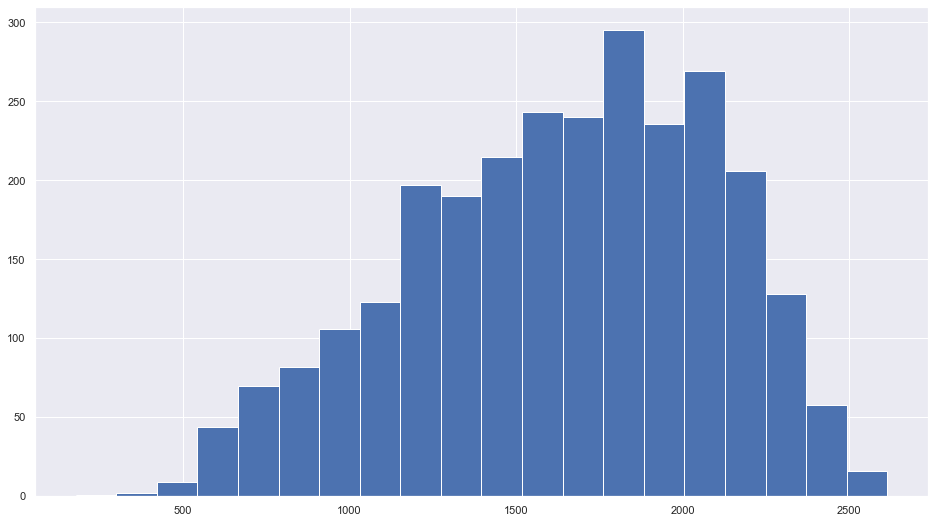

In [4]:
profiles_df.rapid_rating.hist(figsize = (16,9), bins = 20)

Interestingly, the distribution seems to be more left skewed. Possibly this has something to do with more highly rated players playing more games and thus being more likely to be picked in the sampling process?

Next plot the histograms for each time control:

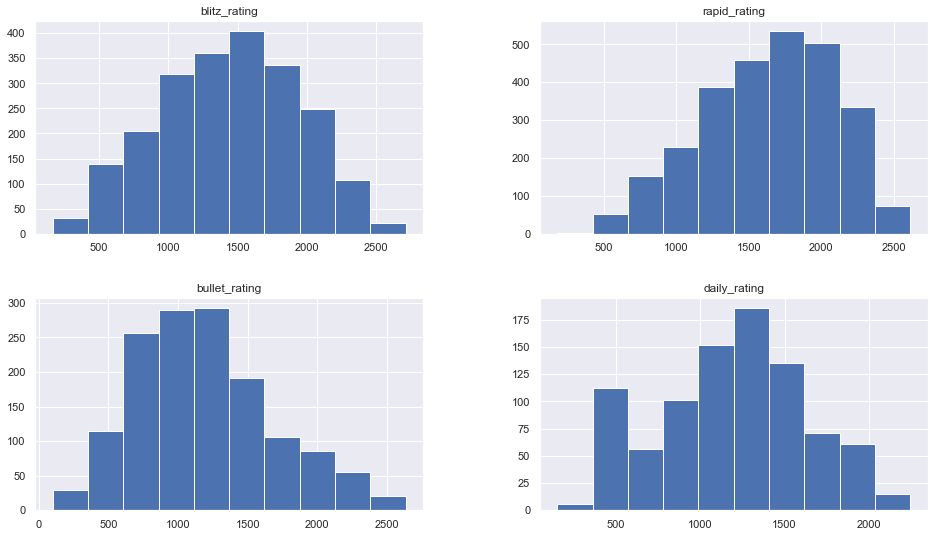

In [5]:
profiles_df.hist(column = ["blitz_rating", "rapid_rating", "bullet_rating", "daily_rating"], figsize = (16,9));

Interestingly seems like the faster time controls are more right skewed (if ignoring daily since most people don't play that). The average ratings also seem much higher than those of the general population.

### Numbers of games played

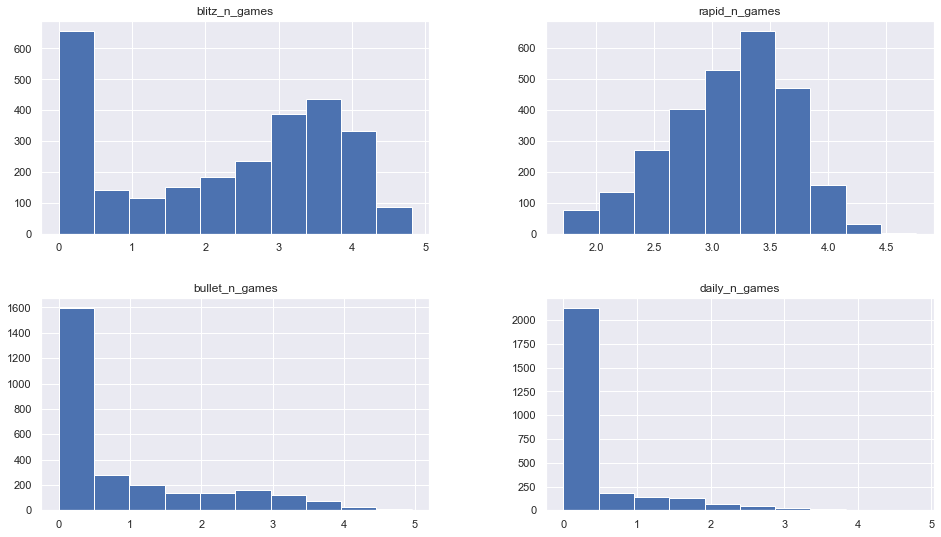

In [6]:
columns = ["blitz_n_games", "rapid_n_games", "bullet_n_games", "daily_n_games"]
np.log10(profiles_df[columns]+1).hist(column = columns, figsize = (16,9));

Some people play a lot of chess! Many haven't played a single game at some of the time controls thoug. We selected players with > 50 rapid games so don't have any with fewer than that.

### Puzzles
Based on the summary data, puzzles are another thing that many people never try but some have spent a lot of time on.

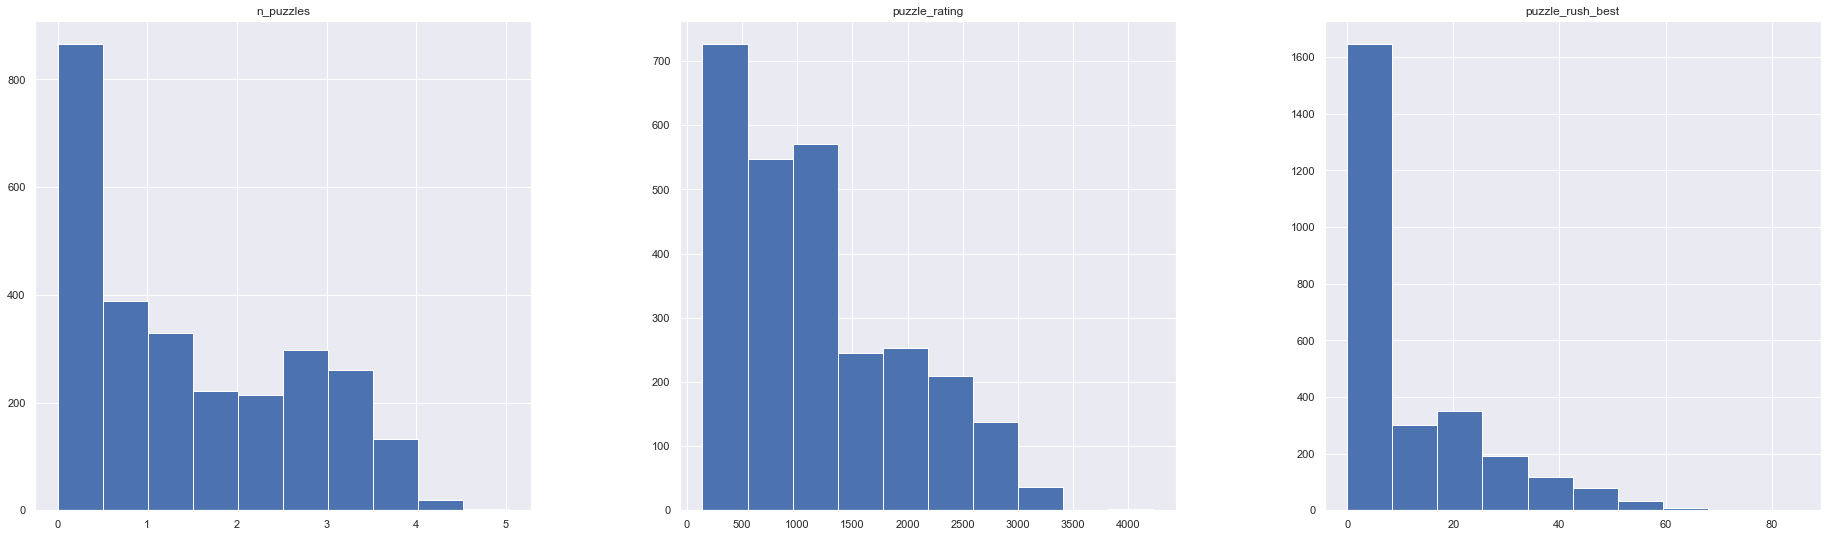

In [7]:
fig, ax = plt.subplots(1,3, figsize = (32,9))
np.log10(profiles_df[["n_puzzles"]]+1).hist(column = "n_puzzles", ax = ax[0]);
profiles_df[["puzzle_rating"]].hist(column = "puzzle_rating", ax = ax[1]);
profiles_df[["puzzle_rush_best"]].hist(column = "puzzle_rush_best", ax = ax[2]);

## Pairwise interactions
### Correlations with rapid rating
Checking how well various things are correlated with rapid rating.

#### Number of rapid games
The number of rapid games played doesn't seem to be correlated with the rapid rating.

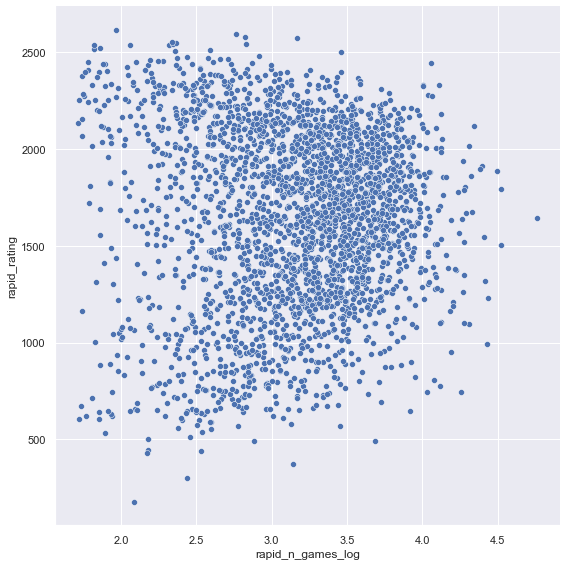

In [8]:
sns.pairplot(profiles_df, x_vars = ["rapid_n_games_log"], y_vars = ["rapid_rating"], height = 8)

#### Blitz rating
Typically people seem to be approximately as good at blitz as in rapid

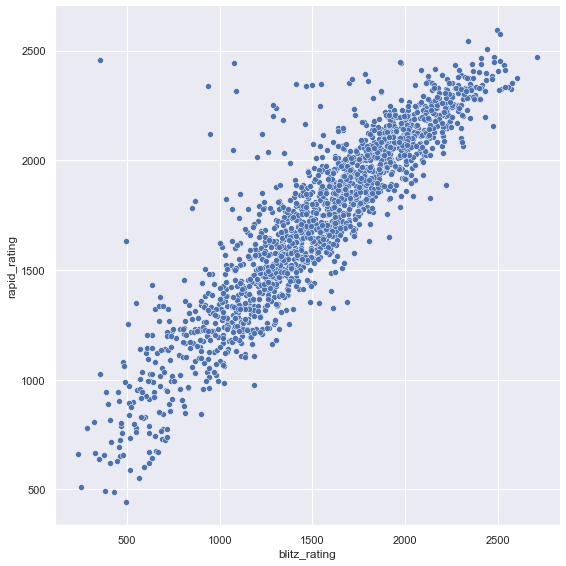

In [9]:
sns.pairplot(profiles_df[profiles_df.blitz_n_games > 50], x_vars = ["blitz_rating"], y_vars = ["rapid_rating"], height = 8)

#### Bullet rating

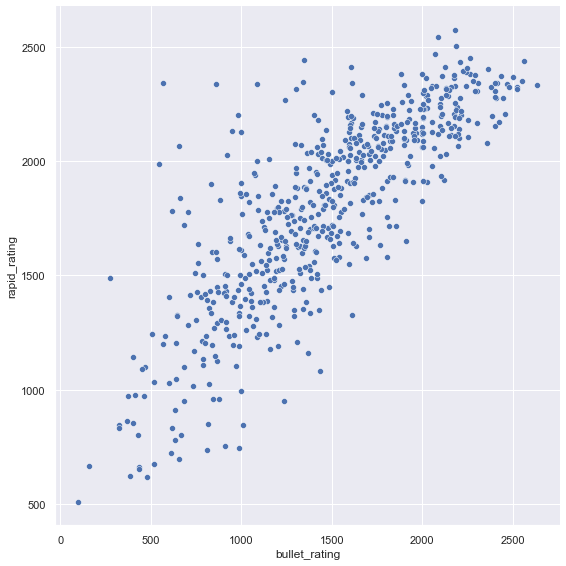

In [10]:
sns.pairplot(profiles_df[profiles_df.bullet_n_games > 50], x_vars = ["bullet_rating"], y_vars = ["rapid_rating"], height = 8)

#### Puzzle rating

Mean puzzle rating for players with > 50 puzzles solved: 1996.6110581506196


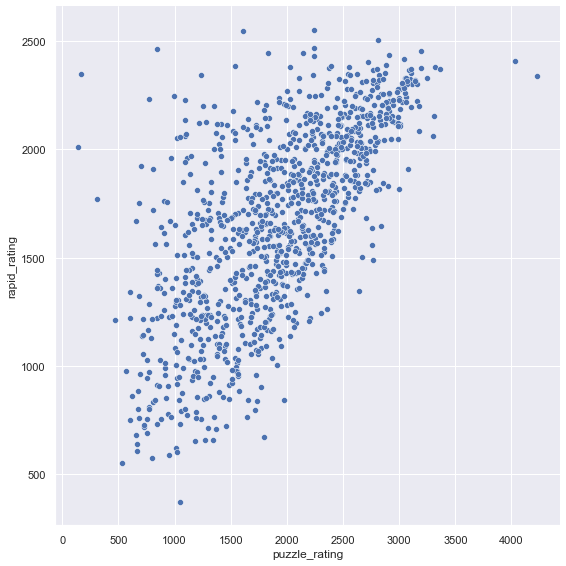

In [11]:
sns.pairplot(profiles_df[profiles_df.n_puzzles > 50], x_vars = ["puzzle_rating"], y_vars = ["rapid_rating"], height = 8)
# Calculate the mean puzzle rating for people with more than 50 puzzles solve
print(f"Mean puzzle rating for players with > 50 puzzles solved: {profiles_df[profiles_df.n_puzzles > 50].n_puzzles.mean()}")

#### Correlation of everything with rapid rating

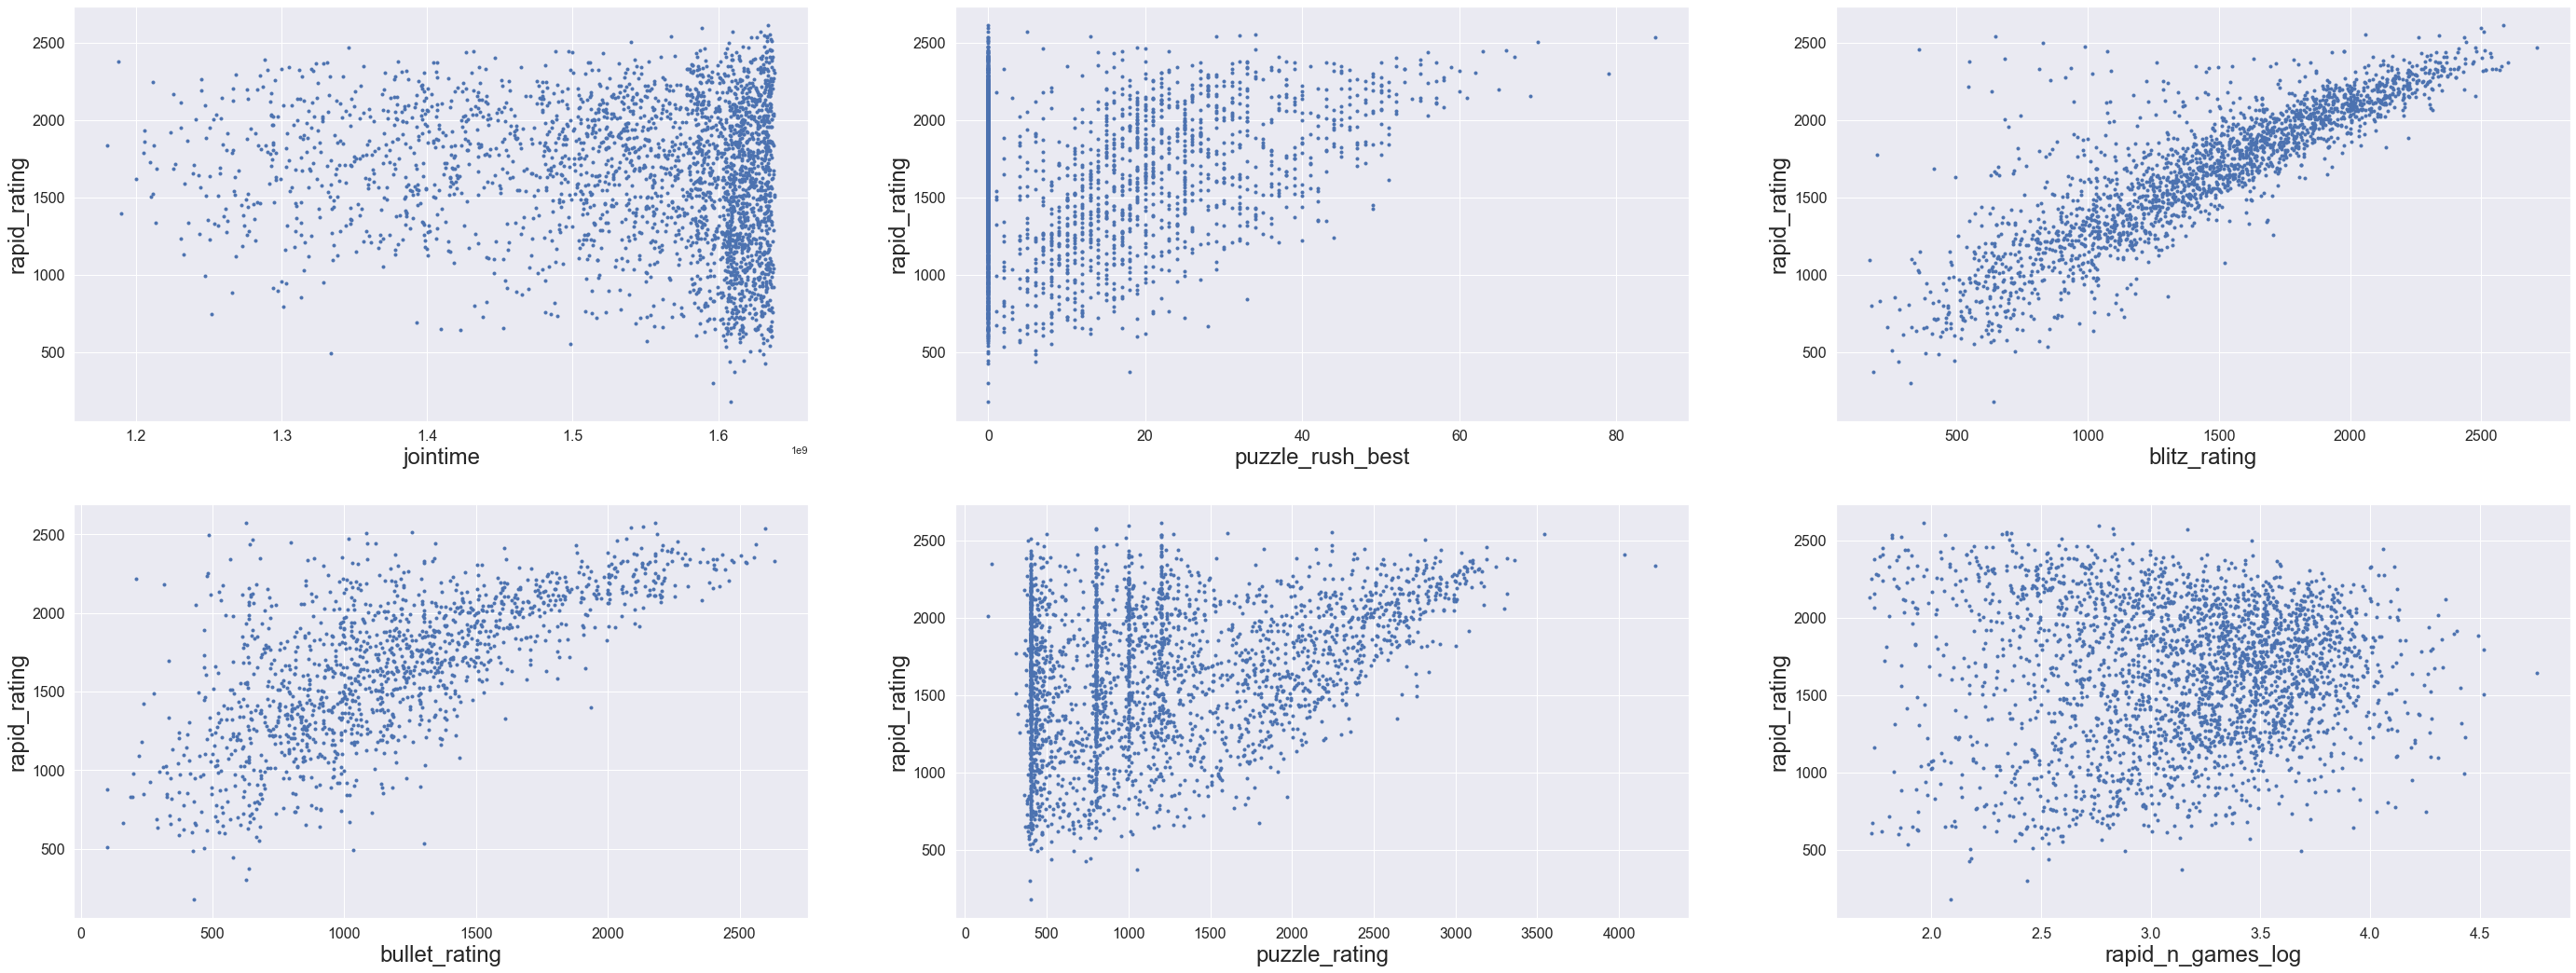

In [13]:
corr_columns = ['jointime', 'puzzle_rush_best', 'blitz_rating', 'bullet_rating', 'puzzle_rating', 'rapid_n_games_log']
target_corr_plot(profiles_df, 'rapid_rating', corr_columns, label_size = 24);